In [167]:
#### data reading 
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x_train, y_train = mnist.train.images, mnist.train.labels
x_test, y_test = mnist.test.images, mnist.test.labels
#############
import numpy as np 
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation
from keras.optimizers import Adam, SGD

####################
### autoencoder setting
encoding_dim = 36# 데이터를 몇 차원으로 줄일 것인지
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder_simple = Model(input_img, decoded) # keras model은 input/output만 집어 넣음 
print("### autoencoder")
autoencoder_simple.summary()
"""
- 일단 autoencoder를 만들었다. 
- autoencoder는 encoder/decoder로 구성되어 있기는 한데, 바로 가져올 수는 없고, input을 새로 만들어서 연결해주어야 함. 
    - 일단 encoder의 경우는 autoencoder와 완전히 동일하므로, 그대로 사용해도 되지만, 헷갈릴 수 있어서 똑같이 만들어줌. 
    - decoder의 경우, 우선 해당 레이어로 바로 들어가는 input이 없으므로 새로운 input을 만들어주고, 
        - 해당 input을 argument로 받아서 해당 레이어를 사용하는 식으로 연결해줌. 
        - layer의 이름이 같은 것을 보면 알 수 있듯이, 그대로 사용하는 것임
- 이렇게 개별 레이어 끝에 argument를 넣어서 가져오는 것 레이어가 callable object이기 때문.
"""
####################
### encoder setting
input_img2 = Input(shape=(784,))
encoder = Model(input_img2, autoencoder_simple.layers[1](input_img2))
# encoder = Model(input_img, encoded) 와 동일 
print("### encoder")
encoder.summary()
####################
### decoder setting
encoded_input = Input(shape=(encoding_dim,))
decoder = Model(encoded_input, autoencoder_simple.layers[2](encoded_input))
print("### decoder")
autoencoder_simple.compile(optimizer='adadelta', loss='binary_crossentropy')
decoder.summary()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
### autoencoder
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_94 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_144 (Dense)            (None, 36)                28260     
_________________________________________________________________
dense_145 (Dense)            (None, 784)               29008     
Total params: 57,268
Trainable params: 57,268
Non-trainable params: 0
_________________________________________________________________
### encoder
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_95 (InputLayer)        (None, 784)        

Epoch 1/10
55000/55000 [==============================] - 5s - loss: 0.1356     
Epoch 2/10
55000/55000 [==============================] - 5s - loss: 0.1344     
Epoch 3/10
55000/55000 [==============================] - 5s - loss: 0.1333     
Epoch 4/10
55000/55000 [==============================] - 5s - loss: 0.1322     
Epoch 5/10
55000/55000 [==============================] - 4s - loss: 0.1311     
Epoch 6/10
55000/55000 [==============================] - 4s - loss: 0.1301     
Epoch 7/10
55000/55000 [==============================] - 4s - loss: 0.1290     
Epoch 8/10
55000/55000 [==============================] - 4s - loss: 0.1280     
Epoch 9/10
55000/55000 [==============================] - 4s - loss: 0.1270     
Epoch 10/10
55000/55000 [==============================] - 4s - loss: 0.1260     


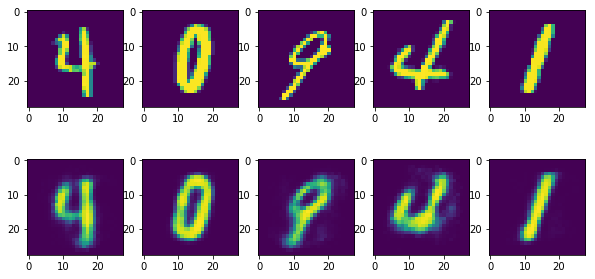

In [170]:
autoencoder_simple.fit(x_train, x_train, epochs=10, batch_size=500, verbose=1)
############
# plotting encoded and decoded img
def random_img_plotting(autoencoder_input, file_name):
    # random으로 5개만 그려줍니다. 
    sel_idx = [ np.random.randint(0, len(x_train)) for i in range(0, 5)]
    f, axes = plt.subplots(2, len(sel_idx), figsize=(10, 5))
    for i in range(0, len(axes[0])):
        axes[0][i].imshow(x_train[sel_idx[i], :].reshape(28, 28))
        axes[1][i].imshow(autoencoder_simple.predict(x_train[[sel_idx[i]], :]).reshape(28, 28))
    plt.savefig("../../assets/images/markdown_img/"+file_name)
    plt.show()
random_img_plotting(autoencoder_simple, '180625_autoencoder_simple.svg')

In [ ]:
"""
이대로는 안되겠어서, autoencoder를 deep하게 만듭니다. 
"""

In [175]:
########
## autoencoder deep 
encoding_dims = 36

input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(encoding_dims, activation='relu')(x)

x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

autoencoder_deep = Model(input_img, decoded)
autoencoder_deep.compile(optimizer='adadelta', loss='binary_crossentropy')
#########
## encoder
input2 = Input(shape=(784,))
x = autoencoder_deep.layers[1](input2)
x = autoencoder_deep.layers[2](x)
x = autoencoder_deep.layers[3](x)
x = autoencoder_deep.layers[4](x)
encoder_deep = Model(input2, x)

#########
## decoder
encoded_input = Input(shape=(36,))
x = autoencoder_deep.layers[5](encoded_input)
x = autoencoder_deep.layers[6](x)
x = autoencoder_deep.layers[7](x)
x = autoencoder_deep.layers[8](x)
decoder_deep = Model(encoded_input, x)

print('autoencoder_deep')
autoencoder_deep.summary()
print("encoder_deep")
encoder_deep.summary()
print("decoder_deep")
decoder_deep.summary()

autoencoder_deep
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_107 (InputLayer)       (None, 784)               0         
_________________________________________________________________
dense_178 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_179 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_180 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_181 (Dense)            (None, 36)                2340      
_________________________________________________________________
dense_182 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_183 (Dense)            (None, 128)               8320

In [178]:
autoencoder_deep.fit(x_train, x_train, 
                     epochs=20, batch_size=500, verbose=1, #validation_data=(x_test, x_test)
                    )

Epoch 1/20
55000/55000 [==============================] - 10s - loss: 0.2025    
Epoch 2/20
55000/55000 [==============================] - ETA: 0s - loss: 0.1975- E - 10s - loss: 0.1975    
Epoch 3/20
55000/55000 [==============================] - 10s - loss: 0.1928    
Epoch 4/20
55000/55000 [==============================] - 10s - loss: 0.1880    
Epoch 5/20
55000/55000 [==============================] - 10s - loss: 0.1840    
Epoch 6/20
55000/55000 [==============================] - 10s - loss: 0.1806    
Epoch 7/20
55000/55000 [==============================] - 10s - loss: 0.1775    
Epoch 8/20
55000/55000 [==============================] - 10s - loss: 0.1748    
Epoch 9/20
55000/55000 [==============================] - 10s - loss: 0.1717    
Epoch 10/20
55000/55000 [==============================] - 10s - loss: 0.1694    
Epoch 11/20
55000/55000 [==============================] - 9s - loss: 0.1667     
Epoch 12/20
55000/55000 [==============================] - 10s - loss: 0.1645  

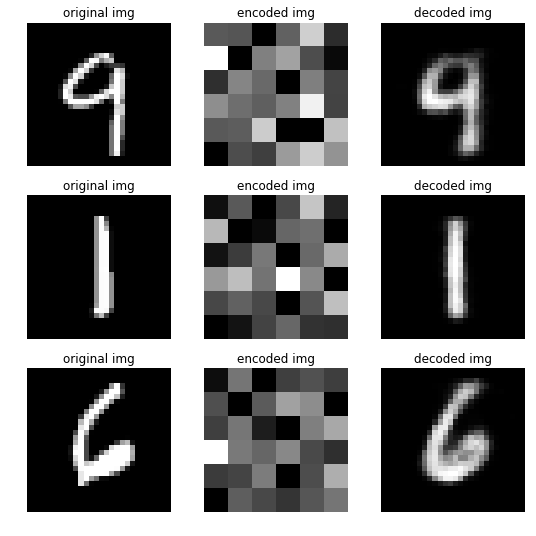

In [189]:
#### encoder, decoder 활용하기 

ks = [8, 12, 3]
f, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, k in enumerate(ks):
    axes[i][0].imshow(x_train[[k], :].reshape(28, 28), cmap=plt.cm.gray)
    axes[i][0].set_title('original img')
    axes[i][0].axis('off')
    axes[i][1].imshow(encoder_deep.predict(x_train[[k], :]).reshape(6,6), cmap=plt.cm.gray)
    axes[i][1].set_title('encoded img')
    axes[i][1].axis('off')
    axes[i][2].imshow(decoder_deep.predict(encoder_deep.predict(x_train[[k], :])).reshape(28,28), 
               cmap=plt.cm.gray)
    axes[i][2].set_title('decoded img')
    axes[i][2].axis('off')
plt.savefig('../../assets/images/markdown_img/180625_autoencoder_deep.svg')
plt.show()

In [190]:
################
### Convolutional auto encoder 
################

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_convolution = Model(input_img, decoded)
autoencoder_convolution.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder_convolution.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_110 (InputLayer)       (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [204]:
## encoder setting 
input_convolution = Input(shape=(28, 28, 1))
x = autoencoder_convolution.layers[1](input_convolution)
for i in range(2, 8):
    x = autoencoder_convolution.layers[i](x)
encoder_convolution = Model(input_convolution, x)
encoder_convolution.summary()

## decoder setting 
encoded_input_convolution = Input(shape=(4,4,8))
x = autoencoder_convolution.layers[8](encoded_input_convolution)
for i in range(9, len(autoencoder_convolution.layers)):
    x = autoencoder_convolution.layers[i](x)
decoder_convolution = Model(encoded_input_convolution, x)
decoder_convolution.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_124 (InputLayer)       (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [ ]:
x_train_img = x_train.reshape(len(x_train), 28, 28, 1)

autoencoder_convolution.fit(x_train_img, x_train_img, 
                            epochs=5, batch_size=500, verbose=1,
                           )

Epoch 1/5
55000/55000 [==============================] - 85s - loss: 0.3501    
Epoch 2/5
55000/55000 [==============================] - 90s - loss: 0.2141    
Epoch 3/5
55000/55000 [==============================] - 95s - loss: 0.1980    
Epoch 4/5
53000/55000 [===========================>..] - ETA: 3s - loss: 0.1884

In [209]:
ks = [8, 12, 3]
f, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, k in enumerate(ks):
    axes[i][0].imshow(x_train_img[[k], :].reshape(28, 28), cmap=plt.cm.gray)
    axes[i][0].set_title('original img')
    axes[i][0].axis('off')
    axes[i][1].imshow(encoder_convolution.predict(x_train_img[[k], :]).reshape(6,6), cmap=plt.cm.gray)
    axes[i][1].set_title('encoded img')
    axes[i][1].axis('off')
    axes[i][2].imshow(decoder_convolution.predict(encoder_convolution.predict(x_train_img[[k], :])).reshape(28,28), 
               cmap=plt.cm.gray)
    axes[i][2].set_title('decoded img')
    axes[i][2].axis('off')
plt.savefig('../../assets/images/markdown_img/180625_autoencoder_convolutional.svg')
plt.show()

TypeError: tuple indices must be integers or slices, not tuple